In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# use seaborn plotting style
plt.style.use('ggplot')

In [23]:
df = pd.read_csv('creditcard.csv')
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Basic data exploration

Non-fraudulent transactions:	0.9983
Fraudulent transactions:	0.0017


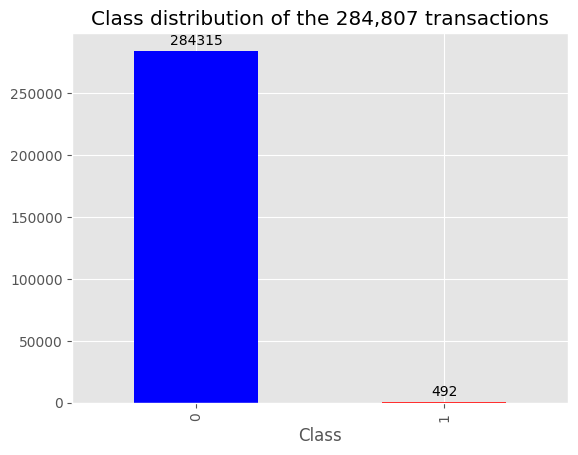

In [32]:
# Plot bar char of the class variable
# print the class distribution
class_pct = df['Class'].value_counts() / df.shape[0]
print(f"Non-fraudulent transactions:\t{class_pct[0]:.4f}")
print(f"Fraudulent transactions:\t{class_pct[1]:.4f}")

fig = plt.figure()
ax = fig.add_subplot(111)
df['Class'].value_counts().plot(kind='bar', ax=ax, color=['b', 'r'])
ax.set_title('Class distribution of the 284,807 transactions')
for i, v in enumerate(df['Class'].value_counts()):
    ax.text(i, v + 5000, str(v), color='black', ha='center')
plt.show()

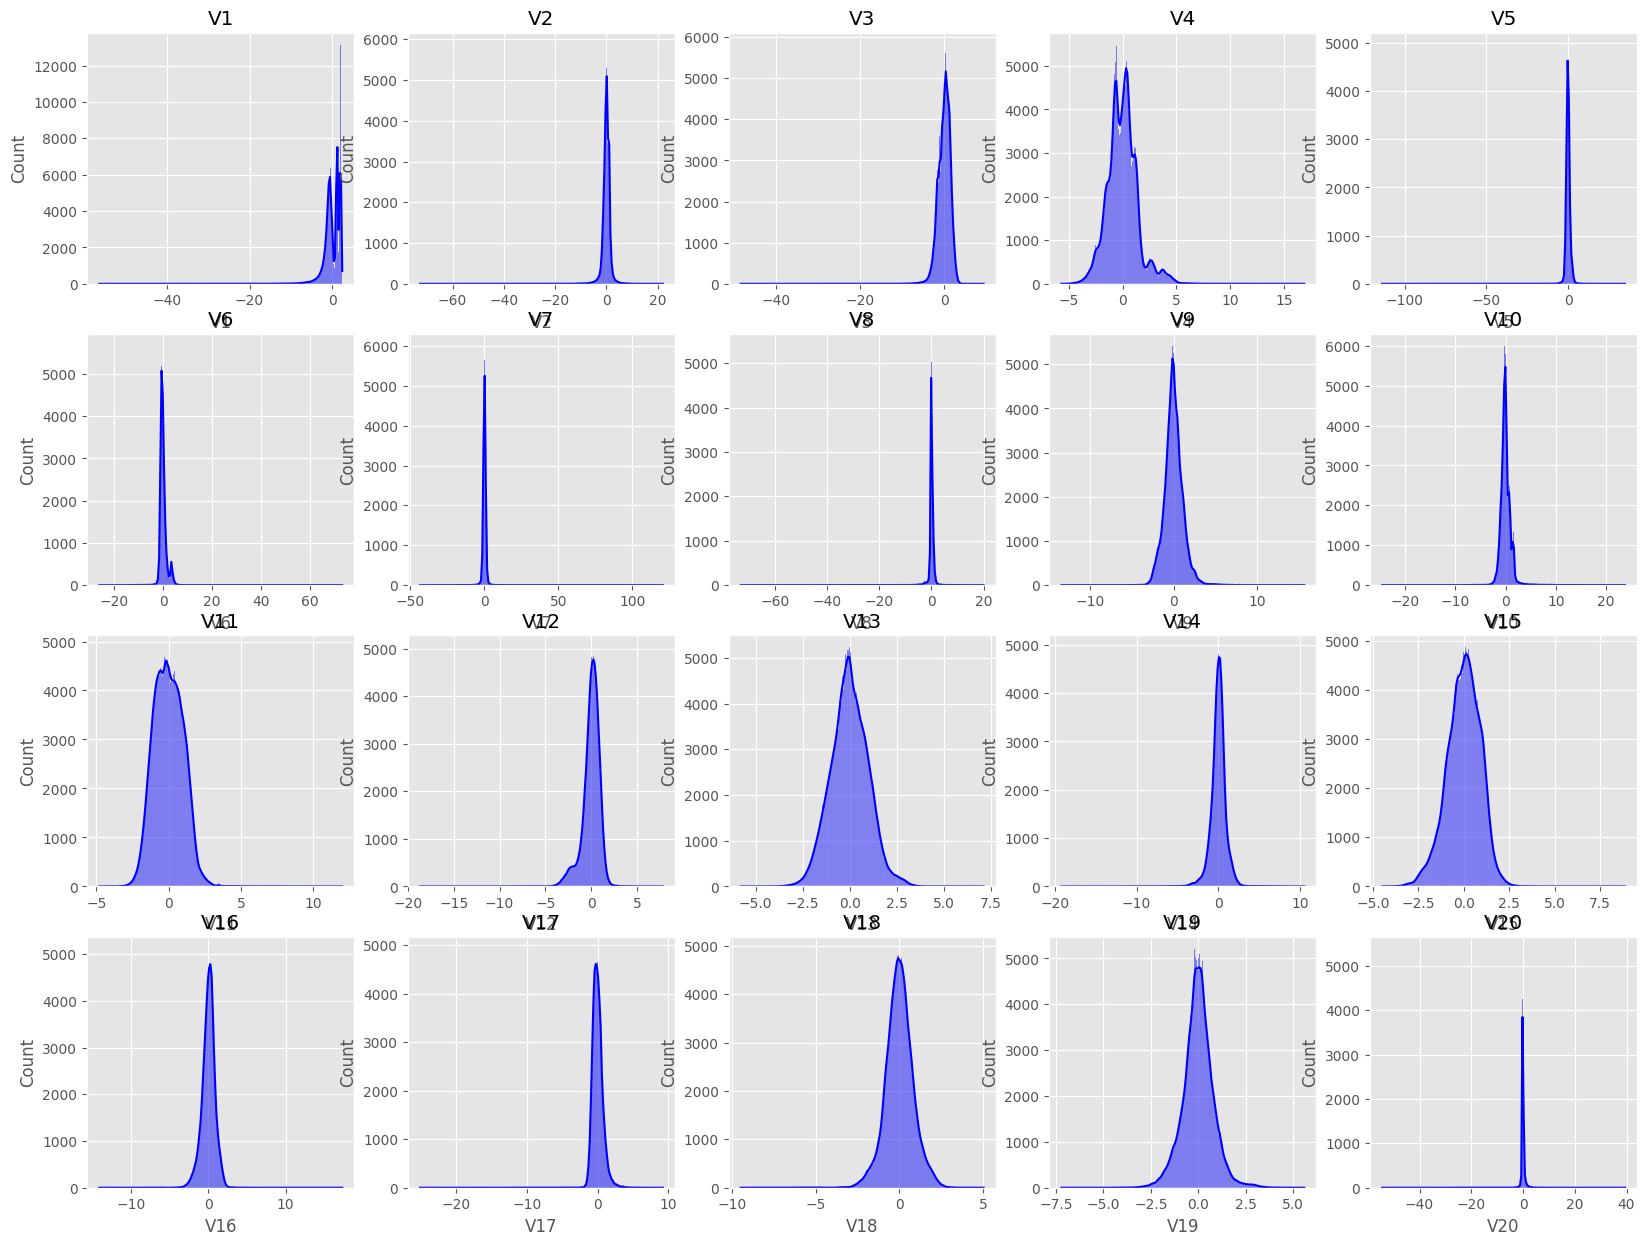

In [36]:
# Plot the distribution of the 20 V features in a 4x5 grid using seasborn distplot
# The features are named V1, V2, ... V20
fig, axes = plt.subplots(4, 5, figsize=(20, 15))
for i, ax in enumerate(axes.ravel()):
    if i < 20:
        sns.histplot(df[f'V{i+1}'], ax=ax, color='b', kde=True)
        ax.set_title(f'V{i+1}')


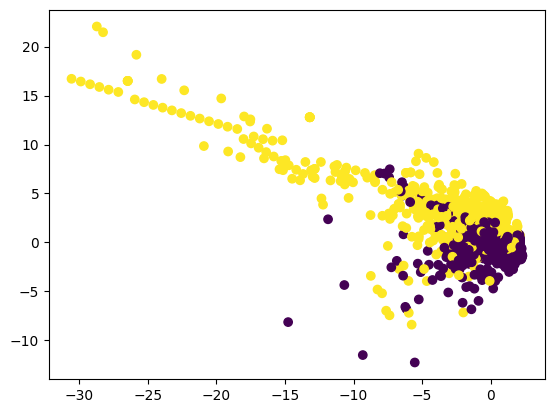

In [18]:
non_fraud_sample = df[df['Class'] == 0].sample(1000)
fraud_sample = df[df['Class'] == 1]

df_sample = pd.concat([non_fraud_sample, fraud_sample]).sample(frac=1).reset_index(drop=True)
df_sample
